In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [4]:
data_root = "http://github.com/ageron/data/raw/main/"
lifesat = pd.read_csv(data_root + "lifesat/lifesat.csv")

In [5]:
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

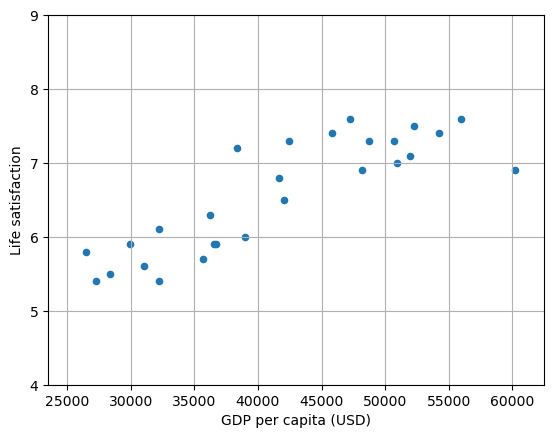

In [6]:
lifesat.plot(kind="scatter", grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23500,62500,4,9])
plt.show()

In [8]:
model = LinearRegression()
model.fit(X, y)

X_new = [[37655.2]]
print(model.predict(X_new))

[[6.30165767]]


In [9]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=3)
model.fit(X, y)
print(model.predict(X_new))

[[6.33333333]]


In [10]:
from pathlib import Path

In [11]:
IMAGE_PATH = Path() / "images"/ "fundamentals"
IMAGE_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGE_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [12]:
import urllib.request

datapath = Path() / "datasets" / "lifesat"
datapath.mkdir(parents=True, exist_ok=True)


data_root = "http://github.com/ageron/data/raw/main/"
for filename in ("oecd_bli.csv", "gdp_per_capita.csv"):
    if not (datapath/ filename) .is_file():
        print("Downloading", filename)
        url = data_root + "lifesat/" + filename
        urllib.request.urlretrieve(url, datapath/ filename)

In [13]:
oecd_bli = pd.read_csv(datapath/ "oecd_bli.csv")
gdp_per_capita =  pd.read_csv(datapath/ "gdp_per_capita.csv")

In [14]:
gdp_year = 2020
gdpppc_col = "GDP per capita (USD)"
lifesat_col = "Life satisfaction"


gdp_per_capita = gdp_per_capita[gdp_per_capita["Year"] == gdp_year]
gdp_per_capita = gdp_per_capita.drop(["Code", "Year"], axis=1)
gdp_per_capita.columns = ["Country", gdpppc_col]
gdp_per_capita.set_index("Country", inplace=True)

gdp_per_capita.head()

,GDP per capita (USD)
Country,
Afghanistan,1978.961579
Africa Eastern and Southern,3387.594670
Africa Western and Central,4003.158913
Albania,13295.410885
Algeria,10681.679297


In [15]:
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"] == "TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
oecd_bli.head()

Indicator,Air pollution,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Feeling safe walking alone at night,Homicide rate,Household net adjusted disposable income,Household net wealth,Housing expenditure,...,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Stakeholder engagement for developing regulations,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,5.0,NaN,81.0,13.04,73.0,63.5,1.1,32759.0,427064.0,20.0,...,49126.0,95.0,NaN,85.0,2.7,502.0,14.35,91.0,93.0,21.0
Austria,16.0,0.9,85.0,6.66,72.0,80.6,0.5,33541.0,308325.0,21.0,...,50349.0,92.0,1.6,70.0,1.3,492.0,14.55,80.0,92.0,17.0
Belgium,15.0,1.9,77.0,4.75,63.0,70.1,1.0,30364.0,386006.0,21.0,...,49675.0,91.0,2.2,74.0,2.0,503.0,15.70,89.0,84.0,19.3
Brazil,10.0,6.7,49.0,7.13,61.0,35.6,26.7,NaN,NaN,NaN,...,NaN,90.0,NaN,NaN,2.2,395.0,NaN,79.0,73.0,16.2
Canada,7.0,0.2,91.0,3.69,73.0,82.2,1.3,30854.0,423849.0,22.0,...,47622.0,93.0,2.6,88.0,2.9,523.0,14.56,68.0,91.0,17.3


In [17]:
min_gdp = 23500
max_gdp = 62500
full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                              left_index=True, right_index=True)
full_country_stats.sort_values(by=gdpppc_col, inplace=True)
full_country_stats = full_country_stats[[gdpppc_col, lifesat_col]]
full_country_stats.head()


,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5


In [18]:
country_stats = full_country_stats[(full_country_stats[gdpppc_col]>=min_gdp) 
                                   & (full_country_stats[gdpppc_col] <= max_gdp)]
country_stats.head()

,GDP per capita (USD),Life satisfaction
Country,,
Russia,26456.387938,5.8
Greece,27287.083401,5.4
Turkey,28384.987785,5.5
Latvia,29932.493910,5.9
Hungary,31007.768407,5.6


In [19]:

country_stats.to_csv(datapath/ "lifesat.csv")
full_country_stats.to_csv(datapath/"lifesat_full.csv")

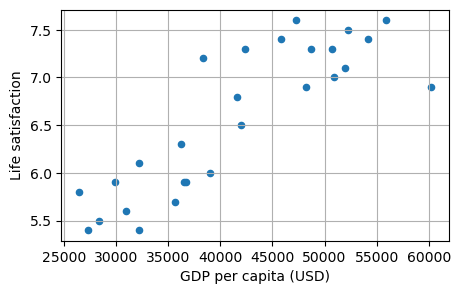

In [21]:
country_stats.plot(kind="scatter", figsize=(5,3), grid=True,
                   x=gdpppc_col, y=lifesat_col)
min_life_sat = 4
max_life_sat = 9

position_text = {
    "Turkey": (29500, 4.2),
    "Hungary" : (28000, 6.9),
    "France" : (40000, 5),
    "New Zealand":    (28000, 8.2),
    "Australia": (50000, 5.5),
    "United States": (59000, 5.3) ,
    "Denmark": (46000, 8.5)
}

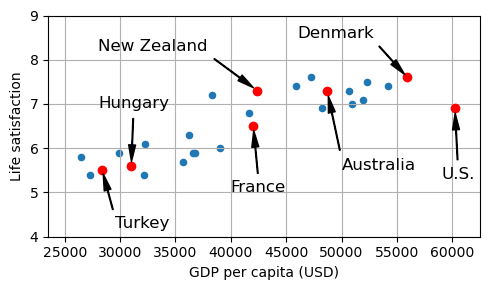

In [23]:
country_stats.plot(kind="scatter", figsize=(5,3), grid=True,
                   x=gdpppc_col, y=lifesat_col)
for country, pos_text in position_text.items():
    pos_data_x = country_stats[gdpppc_col].loc[country]
    pos_data_y = country_stats[lifesat_col].loc[country]
    country = "U.S." if country == "United States" else country
    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor="black", width = 0.5,
                                 shrink=0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
save_fig("money_happy_scatterplot")
plt.show()

In [25]:
highlighted_countries = country_stats.loc[list(position_text.keys())]
highlighted_countries[[gdpppc_col, lifesat_col]].sort_values(by=gdpppc_col)

,GDP per capita (USD),Life satisfaction
Country,,
Turkey,28384.987785,5.5
Hungary,31007.768407,5.6
France,42025.617373,6.5
New Zealand,42404.393738,7.3
Australia,48697.837028,7.3
Denmark,55938.212809,7.6
United States,60235.728492,6.9


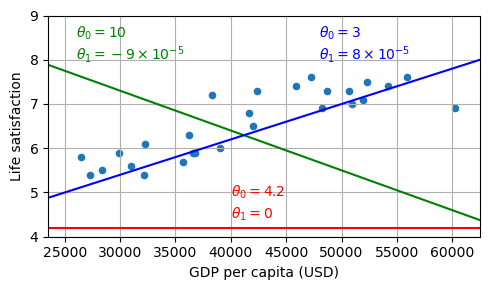

In [30]:
country_stats.plot(kind="scatter", figsize=(5,3), grid=True,
                   x=gdpppc_col, y=lifesat_col)
X = np.linspace(min_gdp, max_gdp, 1000)

w1, w2= 4.2,0
plt.plot(X, w1 + w2*  1e-5 * X, "r")
plt.text(40000, 4.9, fr"$\theta_0 = {w1}$", color="r")
plt.text(40000, 4.4, fr"$\theta_1 = {w2}$", color="r")


w1 , w2 = 10,-9
plt.plot(X, w1 + w2 * 1e-5 * X, "g")
plt.text(26000, 8.5, fr"$\theta_0 = {w1}$", color="g")
plt.text(26000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="g")

w1 , w2 = 3, 8
plt.plot(X, w1 + w2 * 1e-5 * X, "b")
plt.text(48000, 8.5, fr"$\theta_0 = {w1}$", color="b")
plt.text(48000, 8.0, fr"$\theta_1 = {w2} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
save_fig("tweaking_model_params_plot")
plt.show()

In [32]:
X_sample = country_stats[[gdpppc_col]].values
y_sample = country_stats[[lifesat_col]].values

lin1 = LinearRegression()
lin1.fit(X_sample, y_sample)

t0 , t1 = lin1.intercept_[0], lin1.coef_[0][0]

print(f"{t0:.2f}, {t1:.2e}")

3.75, 6.78e-05


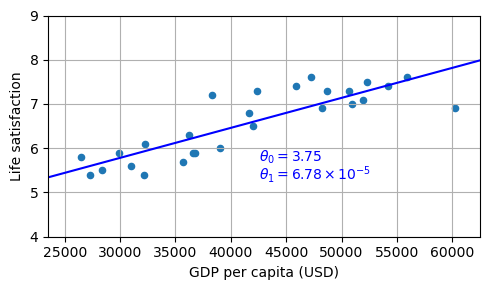

In [34]:
country_stats.plot(kind="scatter", figsize=(5,3), grid=True,
                   x=gdpppc_col, y=lifesat_col)
X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 +t1 *X, "b")

plt.text(max_gdp -20000, min_life_sat + 1.69,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(max_gdp- 20000, min_life_sat + 1.3,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
save_fig("best_fit_model_plot")
plt.show()


In [35]:
cyprus_gdp_per_capita = gdp_per_capita[gdpppc_col].loc["Cyprus"]
cyprus_gdp_per_capita

37655.1803457421

In [36]:
cyprus_predicted_life_satisfaction = lin1.predict([[cyprus_gdp_per_capita]])[0, 0]
cyprus_predicted_life_satisfaction

6.301656332738056

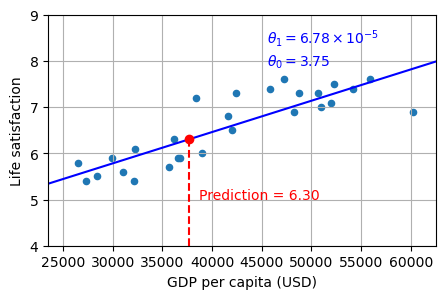

In [37]:
country_stats.plot(kind="scatter", figsize=(5,3), grid=True,
                   x=gdpppc_col, y=lifesat_col)
X = np.linspace(min_gdp, max_gdp, 1000)
plt.plot(X, t0 +t1 *X, "b")


plt.text(min_gdp  + 22000, max_life_sat - 1.1,
         fr"$\theta_0 = {t0:.2f}$", color="b")
plt.text(min_gdp +  22000, max_life_sat - 0.6,
         fr"$\theta_1 = {t1 * 1e5:.2f} \times 10^{{-5}}$", color="b")

plt.plot([cyprus_gdp_per_capita, cyprus_gdp_per_capita],
         [min_life_sat, cyprus_predicted_life_satisfaction], "r--")
plt.text(cyprus_gdp_per_capita + 1000, 5.0,
         fr"Prediction = {cyprus_predicted_life_satisfaction:.2f}", color="r")
plt.plot(cyprus_gdp_per_capita, cyprus_predicted_life_satisfaction, "ro")

plt.axis([min_gdp, max_gdp, min_life_sat, max_life_sat])
plt.show()

In [38]:
missing_data = full_country_stats[(full_country_stats[gdpppc_col] < min_gdp) | (full_country_stats [gdpppc_col] > max_gdp)]

In [39]:
missing_data

,GDP per capita (USD),Life satisfaction
Country,,
South Africa,11466.189672,4.7
Colombia,13441.492952,6.3
Brazil,14063.982505,6.4
Mexico,17887.750736,6.5
Chile,23324.524751,6.5
Norway,63585.903514,7.6
Switzerland,68393.306004,7.5
Ireland,89688.956958,7.0
Luxembourg,110261.157353,6.9


In [40]:
position_text_missing_countries = {
    "South Africa" : (20000, 4.2),
    "Colombia": (6000,8.2),
     "Brazil" : (18000, 7.8),
    "Mexico": (24000,7.4),
     "Chile": (30000,7.0),
      "Norway": (51000,6.2),
     "Switzerland": (62000,5.7),
       "Ireland": (81000,5.2),
       "Luxembourg": (92000,4.7), 
}

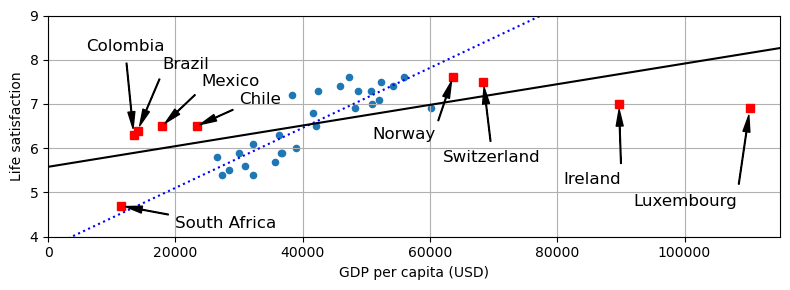

In [42]:
full_country_stats.plot(kind="scatter", figsize=(8,3), grid=True,
                   x=gdpppc_col, y=lifesat_col)

for country, pos_text in position_text_missing_countries.items():
    pos_data_x, pos_data_y = missing_data.loc[country]

    plt.annotate(country, xy=(pos_data_x, pos_data_y),
                 xytext=pos_text, fontsize=12,
                 arrowprops=dict(facecolor="black", width=0.5,
                                 shrink = 0.08, headwidth=5))
    plt.plot(pos_data_x, pos_data_y, "rs")
X = np.linspace(0, 115000 , 1000)
plt.plot(X, t0 +t1 *X, "b:")

lin_reg_full = LinearRegression()
Xfull = np.c_[full_country_stats[gdpppc_col]]
yfull = np.c_[full_country_stats[lifesat_col]]
lin_reg_full.fit(Xfull, yfull)

t0full, t1full = lin_reg_full.intercept_[0], lin_reg_full.coef_[0][0]
X = np.linspace(0, 115000, 1000)
plt.plot(X, t0full +t1full *X, "k")

plt.axis([0, 115000, min_life_sat, max_life_sat])
save_fig("representative_training_data_scatterplot")
plt.show()

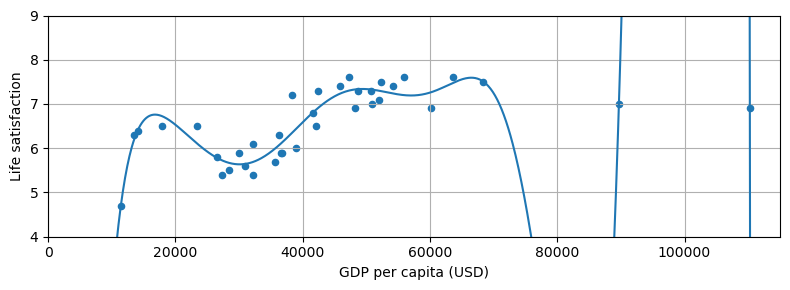

In [43]:
from sklearn import preprocessing, pipeline

full_country_stats.plot(kind="scatter", figsize=(8,3), grid=True,
                   x=gdpppc_col, y=lifesat_col)

poly = preprocessing.PolynomialFeatures(degree=10, include_bias=False)
scaler = preprocessing.StandardScaler()
lin_reg2 = LinearRegression()


pipeline_reg = pipeline.Pipeline([("poly", poly),
                                  ("scal", scaler),
                                  ("lin", lin_reg2)])
pipeline_reg.fit(Xfull, yfull)
curve = pipeline_reg.predict(X[:, np.newaxis])
plt.plot(X, curve)

plt.axis([0, 115000, min_life_sat, max_life_sat])
save_fig("overfitting_model_plot")
plt.show()

In [44]:
w_countries = [c for c in full_country_stats.index if "W" in c.upper()]
full_country_stats.loc[w_countries][lifesat_col]

Country
New Zealand    7.3
Sweden         7.3
Norway         7.6
Switzerland    7.5
Name: Life satisfaction, dtype: float64

In [45]:
all_w_countries = [c for c in gdp_per_capita.index if "W" in c.upper()]
gdp_per_capita.loc[all_w_countries].sort_values(by=gdpppc_col)

,GDP per capita (USD)
Country,
Malawi,1486.778248
Rwanda,2098.710362
Zimbabwe,2744.690758
Africa Western and Central,4003.158913
Papua New Guinea,4101.218882
Lower middle income,6722.809932
Eswatini,8392.717564
Low & middle income,10293.855325
Arab World,13753.707307


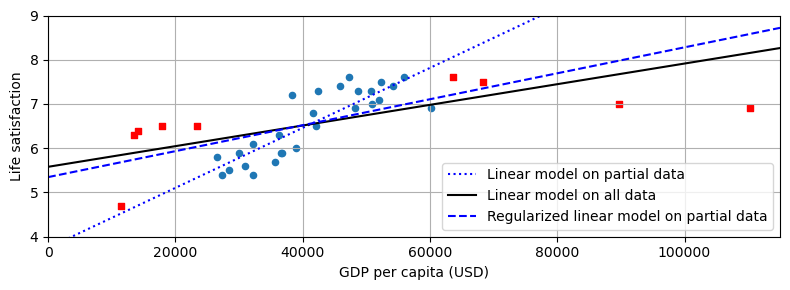

In [48]:
country_stats.plot(kind="scatter", x=gdpppc_col, y=lifesat_col, figsize=(8,3))
missing_data.plot(kind="scatter", x=gdpppc_col, y=lifesat_col,
                  marker="s", color="r", grid=True, ax=plt.gca())

X = np.linspace(0,115000,1000)
plt.plot(X, t0 +t1 *X, "b:", label="Linear model on partial data")
plt.plot(X, t0full + t1full * X, "k-", label="Linear model on all data")

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=10**9.5)
X_sample = country_stats[[gdpppc_col]]
y_sample = country_stats[[lifesat_col]]
ridge.fit(X_sample, y_sample)

t0ridge, t1ridge = ridge.intercept_[0], ridge.coef_[0][0]
plt.plot(X, t0ridge + t1ridge * X, "b--",
         label="Regularized linear model on partial data")
plt.legend(loc="lower right")

plt.axis([0, 115000, min_life_sat, max_life_sat])
save_fig("ridge_model_plot")
plt.show()